In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preparation**




In [3]:
#load dataset
df = pd.read_csv('drive/My Drive/DS/london_crime_by_lsoa.csv')

In [4]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [5]:
df.shape

(13490604, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#cek missing value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

**Mengganti Nama Kolom agar mudah diunakan**

In [8]:
#rename columns
df.rename(columns={'lsoa_code' : 'police_code', 'borough' : 'location'}, inplace=True)
df.head()

,police_code,location,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [9]:
df['location'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

**Menghitung total kejahatan dari Tahun 2008-2016 dan membuat Visualisasi**

In [10]:
#menghitung total kejahatan dari tahun 2008-2016
print('Total Crime in London 2008-2016')
df.groupby(['year'])['value'].sum()

Total Crime in London 2008-2016


year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [11]:
#import library matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])



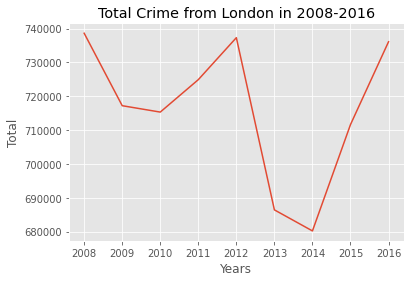


-Tingkat kriminal tertinggi terjadi pada tahun 2008
-Tingkat kriminal terendah terjadi pada tahun 2014
-Tingkat kriminal setiap tahun mengalami perubahan
-Tingkat kriminal mengalami penurunan drastis pada tahun 2013



In [42]:
df.groupby(['year'])['value'].sum().plot(kind='line')
plt.title('Total Crime from London in 2008-2016')
plt.xlabel('Years')
plt.ylabel('Total')
plt.show()
print("""
-Tingkat kriminal tertinggi terjadi pada tahun 2008
-Tingkat kriminal terendah terjadi pada tahun 2014
-Tingkat kriminal setiap tahun mengalami perubahan
-Tingkat kriminal mengalami penurunan drastis pada tahun 2013
""")

**Scatter Plot Total Kriminal dari tahun 2008-2013**

In [13]:
df_total = pd.DataFrame(df.groupby(['year'])['value'].sum())
df_total.reset_index(inplace=True)
df_total.columns=['year','values']
df_total['year']=df_total['year'].astype(int)
df_total

,year,values
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


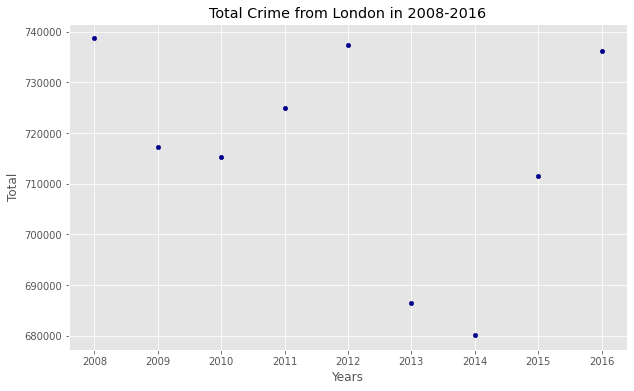

In [43]:
df_total.plot(kind='scatter', x='year', y='values', figsize=(10,6), color='darkblue')
plt.title('Total Crime from London in 2008-2016')
plt.xlabel('Years')
plt.ylabel('Total')
plt.show()

**Top 5 Daerah dengan Tingkat Kriminal Terbanyak**

In [15]:
#Top 5 Daerah dengan Kriminal terbanyak
df_t5 = df.groupby(['location','year'])['value'].sum().reset_index()
df_t5

,location,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990
...,...,...,...
292,Westminster,2012,59226
293,Westminster,2013,53852
294,Westminster,2014,47564
295,Westminster,2015,47395


In [16]:
df_t5=df_t5.pivot(index='year', columns='location', values='value')
df_t5

location,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,22010,22004,21114,25724,13774,15395,24318,20204,26273,20663,10661,31717,27054,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,19851,20718,21211,23704,13948,14538,24605,19783,25485,18742,10163,31225,25182,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,18626,20175,21941,22156,13945,14957,23421,19665,24693,19481,10171,31671,24532,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,18552,21395,22151,23179,12801,15496,24282,21105,24980,19146,10155,33224,24201,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,20028,27095,21030,23231,12803,15965,22103,22724,26268,19757,9956,33473,23652,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,18948,25633,18605,20705,11914,15089,20248,19749,23784,17702,9191,31868,22074,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,19894,24893,19185,22773,11909,14734,23128,20005,24679,17840,9288,31765,21101,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,20929,26941,19848,24626,12601,15870,23234,21286,27032,19070,9738,33164,23437,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,22730,28265,20174,27174,13153,16903,24341,22251,27092,19580,9983,34071,23904,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [17]:
total = df_t5.sum(axis=0)
total = pd.DataFrame([total], index = ['Total'])
df_top5 = pd.concat([df_t5, total])
df_top5


location,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,22010,22004,21114,25724,13774,15395,24318,20204,26273,20663,10661,31717,27054,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,19851,20718,21211,23704,13948,14538,24605,19783,25485,18742,10163,31225,25182,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,18626,20175,21941,22156,13945,14957,23421,19665,24693,19481,10171,31671,24532,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,18552,21395,22151,23179,12801,15496,24282,21105,24980,19146,10155,33224,24201,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,20028,27095,21030,23231,12803,15965,22103,22724,26268,19757,9956,33473,23652,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,18948,25633,18605,20705,11914,15089,20248,19749,23784,17702,9191,31868,22074,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,19894,24893,19185,22773,11909,14734,23128,20005,24679,17840,9288,31765,21101,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,20929,26941,19848,24626,12601,15870,23234,21286,27032,19070,9738,33164,23437,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,22730,28265,20174,27174,13153,16903,24341,22251,27092,19580,9983,34071,23904,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330
Total,149447,212191,114136,227551,184349,275147,780,260294,251562,193880,181568,217119,185259,213272,116848,138947,209680,186772,230286,171981,89306,292178,215137,115654,262024,183562,96771,278809,100987,228613,203879,204741,455028


In [18]:
df_top5 = df_top5.transpose()
df_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
location,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


In [19]:
df_top5.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
location,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [20]:
df_top5 = df_top5.drop(['Total'], axis=1)

In [21]:
dft = df_top5.head(5).transpose()
dft.head()

location,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067


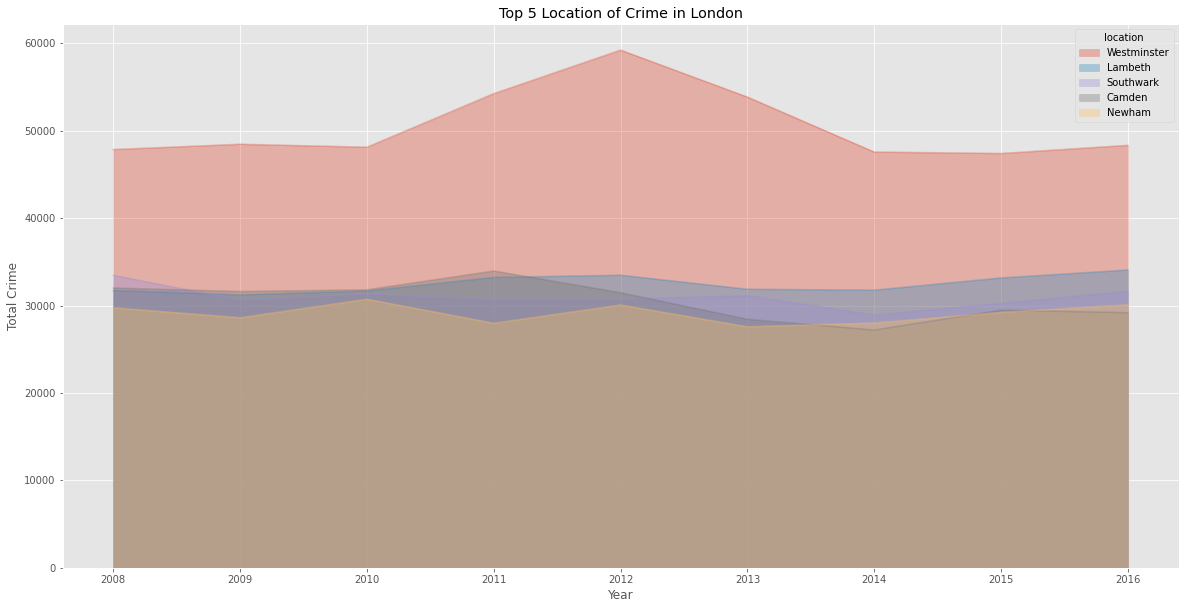

In [22]:
dft.index = dft.index.map(int)
dft.plot(kind='area', alpha=0.35, stacked=False, figsize=(20,10),)
plt.title('Top 5 Location of Crime in London')
plt.ylabel('Total Crime')
plt.xlabel('Year')
plt.show()



*   Westminster adalah lokasi yang paling sering/banyak terjadi kriminal


Urutan daerah dengan tingkat kriminal terbanyak:

1.   Westminster 	 	
2.   Lambeth
3.   Southwark
4.   Camden 	
5.   Newham






# Histogram distribusi tingkat kriminalitas pada tahun 2014 dan 2016

In [23]:
#Histogram
df_2014 = df[df['year']==2014]
df_2014.reset_index()
df_2014 = df_2014.groupby(['location'])['value'].sum()
df_2014



location
Barking and Dagenham      15426
Barnet                    22572
Bexley                    11844
Brent                     24426
Bromley                   19668
Camden                    27198
City of London              115
Croydon                   27357
Ealing                    24978
Enfield                   21700
Greenwich                 19894
Hackney                   24893
Hammersmith and Fulham    19185
Haringey                  22773
Harrow                    11909
Havering                  14734
Hillingdon                23128
Hounslow                  20005
Islington                 24679
Kensington and Chelsea    17840
Kingston upon Thames       9288
Lambeth                   31765
Lewisham                  21101
Merton                    11596
Newham                    28005
Redbridge                 19590
Richmond upon Thames      10456
Southwark                 28912
Sutton                    10443
Tower Hamlets             25504
Waltham Forest            20271

Text(0, 0.5, 'Number of Countries')

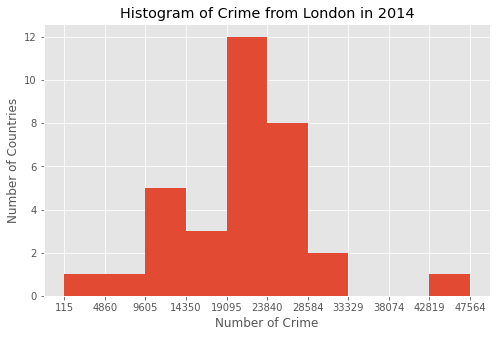

In [44]:
count, bin_edges = np.histogram(df_2014)

df_2014.plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of Crime from London in 2014')
plt.xlabel('Number of Crime')
plt.ylabel('Number of Countries')

In [46]:
print("count = ",count)
print("bin edges = ",bin_edges)

count =  [ 1  0  6  2 10  8  4  1  0  1]
bin edges =  [  178.   4993.2  9808.4 14623.6 19438.8 24254.  29069.2 33884.4 38699.6
 43514.8 48330. ]


Sumbu X menunujukkan kisaran distribusi kriminal dalam interval, sumbu Y mewakili jumlah negara yang berkontribusi pada tingkat kriminal tersebut.


*   12 daerah berkontribusi terjadi kriminal dengan interval antara 19438.8 sampai 24254.




In [25]:
df_2016 = df[df['year']==2016]
df_2016.reset_index()
df_2016 = df_2016.groupby(['location'])['value'].sum()
df_2016


location
Barking and Dagenham      16741
Barnet                    24684
Bexley                    12840
Brent                     26693
Bromley                   20164
Camden                    29183
City of London              178
Croydon                   28712
Ealing                    27127
Enfield                   22485
Greenwich                 22730
Hackney                   28265
Hammersmith and Fulham    20174
Haringey                  27174
Harrow                    13153
Havering                  16903
Hillingdon                24341
Hounslow                  22251
Islington                 27092
Kensington and Chelsea    19580
Kingston upon Thames       9983
Lambeth                   34071
Lewisham                  23904
Merton                    12755
Newham                    30090
Redbridge                 19502
Richmond upon Thames      11074
Southwark                 31636
Sutton                    10658
Tower Hamlets             29253
Waltham Forest            20716

Text(0, 0.5, 'Number of Countries')

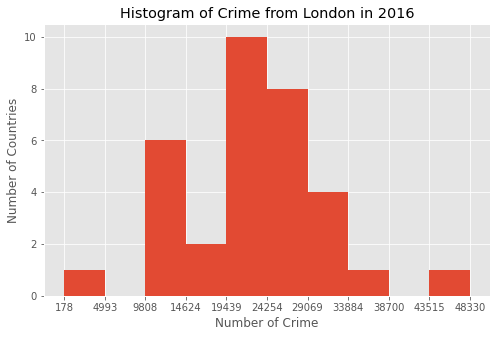

In [45]:
count, bin_edges = np.histogram(df_2016)

df_2016.plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of Crime from London in 2016')
plt.xlabel('Number of Crime')
plt.ylabel('Number of Countries')

Sumbu X menunujukkan kisaran distribusi kriminal dalam interval, sumbu Y mewakili jumlah negara yang berkontribusi pada tingkat kriminal tersebut.


*   10 daerah berkontribusi terjadi kriminal dengan interval antara 19439.8 sampai 24254.




**Persentase Kriminal Kategori Major**

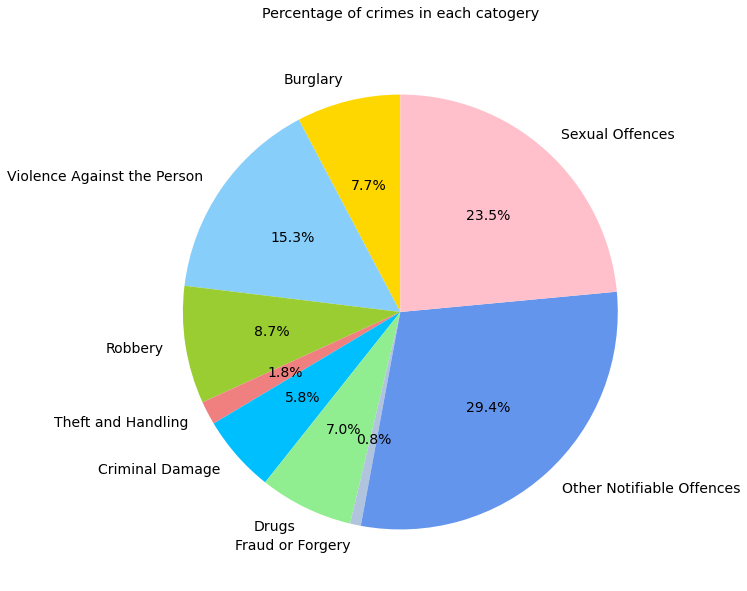

In [27]:
lables=df['major_category'].unique()

sizes=df.groupby(['major_category']).size()
colors=['gold','lightskyblue','yellowgreen','lightcoral', 'deepskyblue','lightgreen','lightsteelblue','cornflowerblue','pink']
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('Percentage of crimes in each catogery\n')
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'black'})
plt.show()



*   Persentase kriminal terbanyak adalah Pelanggaran Lain
*   Persentase kriminal urutan kedua adalah Pelanggaran Seksual
*   Persentase Kriminal yang paling sedikit adalah Penipuan dan Pemalsuan



**Total kriminal masing-masing Kota di London tahun 2008-2016**

In [28]:
df_location = df.groupby(['location'])['value'].sum()
df_location

location
Barking and Dagenham      149447
Barnet                    212191
Bexley                    114136
Brent                     227551
Bromley                   184349
Camden                    275147
City of London               780
Croydon                   260294
Ealing                    251562
Enfield                   193880
Greenwich                 181568
Hackney                   217119
Hammersmith and Fulham    185259
Haringey                  213272
Harrow                    116848
Havering                  138947
Hillingdon                209680
Hounslow                  186772
Islington                 230286
Kensington and Chelsea    171981
Kingston upon Thames       89306
Lambeth                   292178
Lewisham                  215137
Merton                    115654
Newham                    262024
Redbridge                 183562
Richmond upon Thames       96771
Southwark                 278809
Sutton                    100987
Tower Hamlets             228613
W

Text(0.5, 0, 'Number of Crimes')

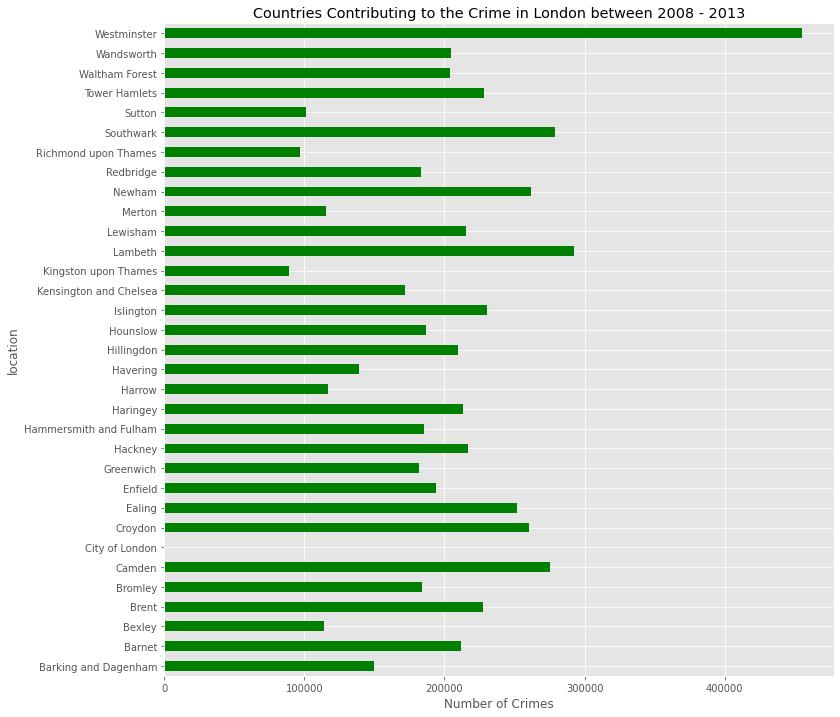

In [29]:
df_location.plot(kind='barh', figsize=(12,12), color='green')
plt.title('Countries Contributing to the Crime in London between 2008 - 2013')
plt.xlabel('Number of Crimes')




*   Westminster merupakan daerah yang paling banyak terjadi kriminal 
*   City of London merupakan daerah yang paling sedikit terjadi kriminal



**Dari plot sebelumnya, dapat dilihat bahwa daerah Wandsworth & Waltham Forest memiliki jumlah tren kriminal yang hampir sama, selanjutnya dapat menganalisis lebih jauh kedua daerah ini dengan box plot.**

In [37]:
df_LC = df.groupby(['location','year'])['value'].sum().reset_index()
df_LC=df_LC.pivot(index='year', columns='location', values='value')
df_LC

location,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,22010,22004,21114,25724,13774,15395,24318,20204,26273,20663,10661,31717,27054,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,19851,20718,21211,23704,13948,14538,24605,19783,25485,18742,10163,31225,25182,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,18626,20175,21941,22156,13945,14957,23421,19665,24693,19481,10171,31671,24532,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,18552,21395,22151,23179,12801,15496,24282,21105,24980,19146,10155,33224,24201,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,20028,27095,21030,23231,12803,15965,22103,22724,26268,19757,9956,33473,23652,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,18948,25633,18605,20705,11914,15089,20248,19749,23784,17702,9191,31868,22074,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,19894,24893,19185,22773,11909,14734,23128,20005,24679,17840,9288,31765,21101,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,20929,26941,19848,24626,12601,15870,23234,21286,27032,19070,9738,33164,23437,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,22730,28265,20174,27174,13153,16903,24341,22251,27092,19580,9983,34071,23904,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


In [38]:
df_LC.columns

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object', name='location')

In [39]:
df_LC = df_LC[['Wandsworth','Waltham Forest']]
df_LC

location,Wandsworth,Waltham Forest
year,,
2008,23330,24080
2009,23021,24761
2010,22815,24818
2011,21384,23714
2012,24457,22647
2013,22290,21903
2014,21364,20271
2015,22401,20969
2016,23679,20716


In [40]:
df_LC.describe()

location,Wandsworth,Waltham Forest
count,9.000000,9.000000
mean,22749.000000,22653.222222
std,1019.270573,1771.906585
min,21364.000000,20271.000000
25%,22290.000000,20969.000000
50%,22815.000000,22647.000000
75%,23330.000000,24080.000000
max,24457.000000,24818.000000


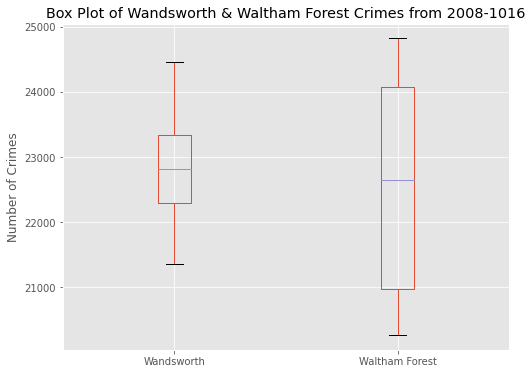

In [41]:
df_LC.plot(kind='box', figsize=(8,6))
plt.title('Box Plot of Wandsworth & Waltham Forest Crimes from 2008-1016')
plt.ylabel('Number of Crimes')
plt.show()

* Wandsworth & Waltham Forest memiliki rata-rata kriminal yang hampir sama (~22.000)
* Range kriminal di Waltham Forest lebih tersebar daripada di Wandsworth
* Jumlah kriminal maksimum dari Waltham untuk setiap tahun (24818) lebih tinggi dari Wandsworth (24457)